# Brain Stroke Detection using CNN

In [1]:
import cv2,os
data_path='dataset/'
categories=os.listdir(data_path)

labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

# 1072 he,1551 i,1551 n   4822 t

{'hemorrhagic': 0, 'ischaemic': 1, 'Normal': 2}
['hemorrhagic', 'ischaemic', 'Normal']
[0, 1, 2]


In [2]:
img_size_x=256
img_size_y=256
data=[]
label=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)
        try:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
            resized=cv2.resize(gray,(img_size_x,img_size_y))
            #resizing the image  into 256 x 256, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            label.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

# Recale and assign  catagorical labels

In [3]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size_x,img_size_y,1))
label=np.array(label)
from tensorflow.keras.utils import to_categorical
new_label=to_categorical(label)

# CNN Model

In [4]:
data.shape

(4822, 256, 256, 1)

In [5]:
data.shape[1:]

(256, 256, 1)

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint


model=Sequential()

model.add(Conv2D(32,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The thrid convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
#Flatten layer to stack the output convolutions from 3rd convolution layer
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
#Dense layer of 128 neurons

model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
#Dense layer of 64 neurons

model.add(Dense(3,activation='sigmoid'))
#The Final layer with two outputs for two categories

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      320       
                                                                 
 activation (Activation)     (None, 254, 254, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 125, 125, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                   

# Splitting data into traning and testing

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,new_label,test_size=0.2)


In [9]:
x_train.shape

(3857, 256, 256, 1)

In [10]:
y_train.shape

(3857, 3)

In [11]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (adjust test_size and random_state as needed)
x_train, x_test, y_train, y_test = train_test_split(data, new_label, test_size=0.2, random_state=42)

# Further split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.7, random_state=42)

# Get the number of samples in each set for each class
train_counts = np.sum(y_train, axis=0)
test_counts = np.sum(y_test, axis=0)
val_counts = np.sum(y_val, axis=0)

# Print the counts for each class in each set
for i, category in enumerate(categories):
    print(f"Class: {category}")
    print(f"Training samples: {train_counts[i]}")
    print(f"Testing samples: {test_counts[i]}")
    print(f"Validation samples: {val_counts[i]}")
    print()

Class: hemorrhagic
Training samples: 399.0
Testing samples: 365.0
Validation samples: 956.0

Class: ischaemic
Training samples: 381.0
Testing samples: 271.0
Validation samples: 899.0

Class: Normal
Training samples: 377.0
Testing samples: 329.0
Validation samples: 845.0



In [12]:
history=model.fit(x_train,y_train,epochs=15,validation_split=0.7)

Epoch 1/15
11/11 [==============================] - 33s 3s/step - loss: 0.6545 - accuracy: 0.3343 - val_loss: 0.6393 - val_accuracy: 0.3469
Epoch 2/15
11/11 [==============================] - 28s 3s/step - loss: 0.6234 - accuracy: 0.4063 - val_loss: 0.6363 - val_accuracy: 0.3531
Epoch 3/15
11/11 [==============================] - 26s 2s/step - loss: 0.5918 - accuracy: 0.5014 - val_loss: 0.6292 - val_accuracy: 0.4235
Epoch 4/15
11/11 [==============================] - 20s 2s/step - loss: 0.5070 - accuracy: 0.5937 - val_loss: 0.6306 - val_accuracy: 0.4457
Epoch 5/15
11/11 [==============================] - 20s 2s/step - loss: 0.4018 - accuracy: 0.7435 - val_loss: 0.6508 - val_accuracy: 0.4556
Epoch 6/15
11/11 [==============================] - 20s 2s/step - loss: 0.3123 - accuracy: 0.8127 - val_loss: 0.7943 - val_accuracy: 0.4704
Epoch 7/15
11/11 [==============================] - 20s 2s/step - loss: 0.2232 - accuracy: 0.8876 - val_loss: 0.7684 - val_accuracy: 0.4802
Epoch 8/15
11/11 [==

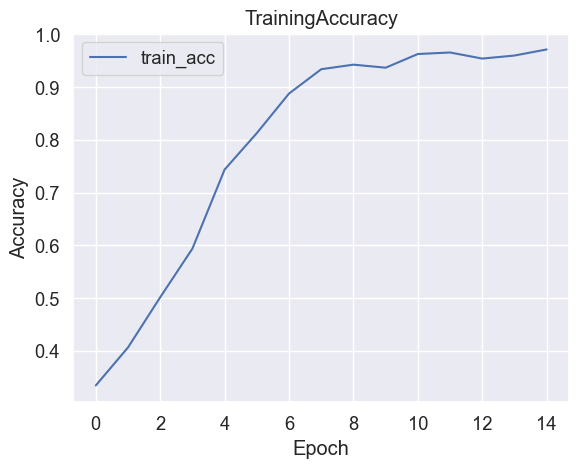

In [19]:
import matplotlib.pyplot as plt

N = 15 #number of epochs
plt.figure()
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.title("TrainingAccuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)

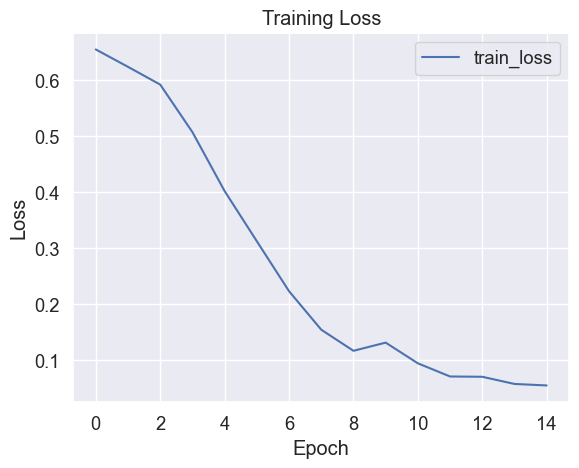

In [20]:
import matplotlib.pyplot as plt

N = 15 #number of epochs
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)

31/31 [==============================] - 14s 445ms/step


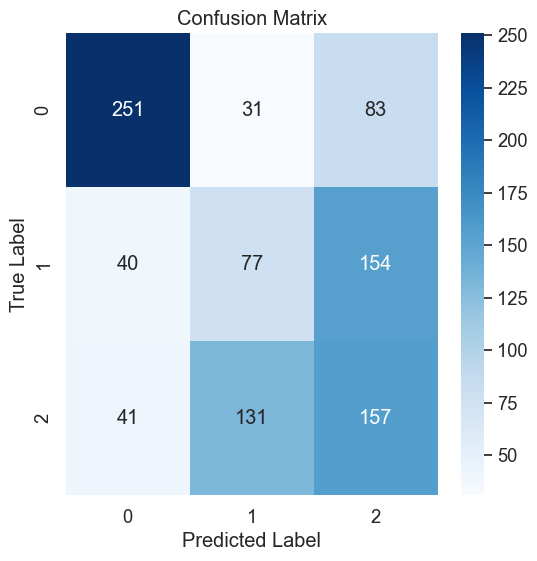

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Make predictions on the test data
y_pred = model.predict(x_test)

# Convert predicted labels and true labels to their corresponding classes
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Get class labels
classes = unique_labels(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


31/31 [==============================] - 14s 459ms/step


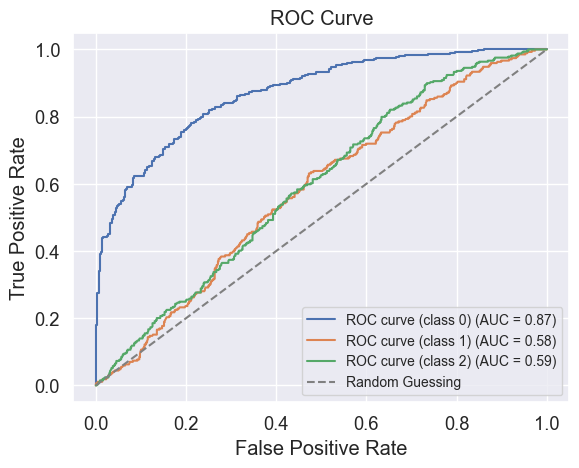

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Compute the predicted probabilities for each class
y_score = model.predict(x_test)

# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2]) 

# Compute the ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
# plt.figure(figsize=(6, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(prop={'size': 10})
plt.grid(True)
plt.show()


In [23]:
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, recall_score, precision_score, f1_score
import numpy as np

# Make predictions on the test data
y_pred = model.predict(x_test)

# Convert predicted labels and true labels to their corresponding classes
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)

# Calculate recall
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')

# Calculate precision
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')

# Calculate F1 score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Compute the predicted probabilities for each class
y_score = model.predict(x_test)

# Binarize the true labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])

# Compute the ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(3):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Print accuracy, recall, precision, and F1 score
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print ROC AUC for each class
for i in range(3):
    print(f"Class {i} - ROC AUC: {roc_auc[i]}")


31/31 [==============================] - 13s 414ms/step
Accuracy: 0.5025906735751295
Recall: 0.5025906735751295
Precision: 0.512287464645864
F1 Score: 0.5052853479416332
Confusion Matrix:
[[251  31  83]
 [ 40  77 154]
 [ 41 131 157]]
Class 0 - ROC AUC: 0.8709908675799087
Class 1 - ROC AUC: 0.5796202558567373
Class 2 - ROC AUC: 0.5941604060331479


In [24]:
model.save('model.h5')

C:\Users\rudrani\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
